In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('results_2024_winners.csv')

In [8]:
df.head()

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
2,Andhra Pradesh,19,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared
3,Andhra Pradesh,1,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared
4,Andhra Pradesh,15,Bapatla (SC),KRISHNA PRASAD TENNETI,Telugu Desam,NANDIGAM SURESH BABU,Yuvajana Sramika Rythu Congress Party,208031,Result Declared


In [9]:
rows, columns = df.shape
print(f'Total rows: {rows}, Total columns: {columns}')

Total rows: 543, Total columns: 9


In [8]:
print(df.dtypes)


State                  object
PC No                   int64
PC Name                object
Winning Candidate      object
Winning Party          object
Runner-up Canddiate    object
Runner-up Party        object
Margin Votes           object
Results Status         object
dtype: object


In [11]:
df.describe()

,PC No
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


In [12]:
df.isnull().sum()

State                  0
PC No                  0
PC Name                0
Winning Candidate      0
Winning Party          0
Runner-up Canddiate    1
Runner-up Party        1
Margin Votes           0
Results Status         0
dtype: int64

In [13]:
unique_states = df['State'].unique()
print(unique_states)

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'West Bengal' 'Chhattisgarh' 'Jharkhand' 'Uttarakhand' 'Telangana'
 'Andaman & Nicobar Islands' 'Chandigarh'
 'Dadra & Nagar Haveli and Daman & Diu' 'NCT OF Delhi' 'Lakshadweep'
 'Puducherry' 'Jammu and Kashmir' 'Ladakh']


In [15]:
unique_party = df[['Winning Party', 'Runner-up Party']].apply(lambda x: x.unique())
print(unique_party)

Winning Party      [Telugu Desam, Bharatiya Janata Party, Yuvajan...
Runner-up Party    [Yuvajana Sramika Rythu Congress Party, Bharat...
dtype: object


In [16]:
unique_parties = df[['Winning Party', 'Runner-up Party']].stack().unique()
print(unique_parties)


['Telugu Desam' 'Yuvajana Sramika Rythu Congress Party'
 'Bharatiya Janata Party' 'Janasena Party' 'Indian National Congress'
 'Asom Gana Parishad' 'All India United Democratic Front'
 'Assam Jatiya Parishad' 'Independent' 'United People’s Party, Liberal'
 'Bodoland Peoples Front' 'Rashtriya Janata Dal'
 'Communist Party of India  (Marxist-Leninist)  (Liberation)'
 'Janata Dal  (United)' 'Communist Party of India'
 'Hindustani Awam Morcha (Secular)' 'Vikassheel Insaan Party'
 'Lok Janshakti Party(Ram Vilas)' 'Communist Party of India  (Marxist)'
 'Aam Aadmi Party' 'Janata Dal  (Secular)' 'Revolutionary Socialist Party'
 'Kerala Congress' 'Kerala Congress  (M)' 'Indian Union Muslim League'
 'Bahujan Samaj Party' 'Nationalist Congress Party – Sharadchandra Pawar'
 'Shiv Sena' 'All India Majlis-E-Ittehadul Muslimeen'
 'Nationalist Congress Party' 'Shiv Sena (Uddhav Balasaheb Thackrey)'
 'Rashtriya Samaj Paksha' 'Naga Peoples Front' 'Voice of the People Party'
 "National People's Party" 'Z

In [18]:
unique_parties = pd.DataFrame(df[['Winning Party', 'Runner-up Party']].stack().unique(), columns=['Parties'])
print(unique_parties)

                                     Parties
0                               Telugu Desam
1      Yuvajana Sramika Rythu Congress Party
2                     Bharatiya Janata Party
3                             Janasena Party
4                   Indian National Congress
..                                       ...
57                    Jharkhand Mukti Morcha
58                                AJSU Party
59                    Bharat Rashtra Samithi
60       Jammu & Kashmir National Conference
61  Jammu & Kashmir Peoples Democratic Party

[62 rows x 1 columns]


In [19]:
unique_parties = pd.DataFrame(df[['Winning Party', 'Runner-up Party']].stack().unique(), columns=['Parties'])
for party in unique_parties['Parties']:
    print(party)


Telugu Desam
Yuvajana Sramika Rythu Congress Party
Bharatiya Janata Party
Janasena Party
Indian National Congress
Asom Gana Parishad
All India United Democratic Front
Assam Jatiya Parishad
Independent
United People’s Party, Liberal
Bodoland Peoples Front
Rashtriya Janata Dal
Communist Party of India  (Marxist-Leninist)  (Liberation)
Janata Dal  (United)
Communist Party of India
Hindustani Awam Morcha (Secular)
Vikassheel Insaan Party
Lok Janshakti Party(Ram Vilas)
Communist Party of India  (Marxist)
Aam Aadmi Party
Janata Dal  (Secular)
Revolutionary Socialist Party
Kerala Congress
Kerala Congress  (M)
Indian Union Muslim League
Bahujan Samaj Party
Nationalist Congress Party – Sharadchandra Pawar
Shiv Sena
All India Majlis-E-Ittehadul Muslimeen
Nationalist Congress Party
Shiv Sena (Uddhav Balasaheb Thackrey)
Rashtriya Samaj Paksha
Naga Peoples Front
Voice of the People Party
National People's Party
Zoram People’s Movement
Mizo National Front
Nationalist Democratic Progressive Party
Bij

In [20]:
#Counting the number of results for each state

state_result_counts = df['State'].value_counts()
print(state_result_counts)

Uttar Pradesh                           80
Maharashtra                             48
West Bengal                             42
Bihar                                   40
Tamil Nadu                              39
Madhya Pradesh                          29
Karnataka                               28
Gujarat                                 26
Andhra Pradesh                          25
Rajasthan                               25
Odisha                                  21
Kerala                                  20
Telangana                               17
Jharkhand                               14
Assam                                   14
Punjab                                  13
Chhattisgarh                            11
Haryana                                 10
NCT OF Delhi                             7
Jammu and Kashmir                        5
Uttarakhand                              5
Himachal Pradesh                         4
Meghalaya                                2
Dadra & Nag

In [24]:
#Filtering records based on a specific state


Uttar_Pradesh_results = df[df['State'] == 'Uttar Pradesh']
print(Uttar_Pradesh_results)



             State  PC No         PC Name                 Winning Candidate  \
355  Uttar Pradesh     18            Agra             PROF S P SINGH BAGHEL   
356  Uttar Pradesh     44        Akbarpur  DEVENDRA SINGH ALIAS BHOLE SINGH   
357  Uttar Pradesh     15         Aligarh               SATISH KUMAR GAUTAM   
358  Uttar Pradesh     52       Allahabad                UJJWAL RAMAN SINGH   
359  Uttar Pradesh     55  Ambedkar Nagar                       LALJI VERMA   
..             ...    ...             ...                               ...   
430  Uttar Pradesh     58       Shrawasti               RAM SHIROMANI VERMA   
431  Uttar Pradesh     30         Sitapur                     RAKESH RATHOR   
432  Uttar Pradesh     38       Sultanpur                   RAMBHUAL NISHAD   
433  Uttar Pradesh     33           Unnao   SWAMI SACHCHIDANAND HARI SAKSHI   
434  Uttar Pradesh     77        Varanasi                     NARENDRA MODI   

                Winning Party   Runner-up Canddiate

In [25]:
!pip install tabulate


In [26]:
from tabulate import tabulate

# Assuming your DataFrame is named df
Uttar_Pradesh_results = df[df['State'] == 'Uttar Pradesh']

# Convert the DataFrame to a list of lists for tabulate
data = Uttar_Pradesh_results.values.tolist()

# Get the column headers
headers = Uttar_Pradesh_results.columns.tolist()

# Print the tabulated data
print(tabulate(data, headers=headers))


State            PC No  PC Name              Winning Candidate                     Winning Party                   Runner-up Canddiate                   Runner-up Party                   Margin Votes  Results Status
-------------  -------  -------------------  ------------------------------------  ------------------------------  ------------------------------------  ------------------------------  --------------  ----------------
Uttar Pradesh       18  Agra                 PROF S P SINGH BAGHEL                 Bharatiya Janata Party          SURESH CHAND KARDAM                   Samajwadi Party                         271294  Result Declared
Uttar Pradesh       44  Akbarpur             DEVENDRA SINGH ALIAS BHOLE SINGH      Bharatiya Janata Party          RAJARAM PAL                           Samajwadi Party                          44345  Result Declared
Uttar Pradesh       15  Aligarh              SATISH KUMAR GAUTAM                   Bharatiya Janata Party          BIJENDRA SINGH   

In [35]:

from tabulate import tabulate

Maharashtra_results = df[df['State'] == 'Maharashtra']

# Convert the DataFrame to a list of lists for tabulate
data = Maharashtra_results.values.tolist()

# Get the column headers
headers = Maharashtra_results.columns.tolist()

# Print the tabulated data
print(tabulate(data, headers=headers))

State          PC No  PC Name                Winning Candidate                                   Winning Party                                     Runner-up Canddiate                        Runner-up Party                                     Margin Votes  Results Status
-----------  -------  ---------------------  --------------------------------------------------  ------------------------------------------------  -----------------------------------------  ------------------------------------------------  --------------  ----------------
Maharashtra       37  Ahmednagar             NILESH DNYANDEV LANKE                               Nationalist Congress Party – Sharadchandra Pawar  DR. SUJAY RADHAKRISHNA VIKHEPATIL          Bharatiya Janata Party                                     28929  Result Declared
Maharashtra        6  Akola                  ANUP SANJAY DHOTRE                                  Bharatiya Janata Party                            ABHAY KASHINATH PATIL                

In [36]:
from tabulate import tabulate

Madhya_Pradesh_results = df[df['State'] == 'Madhya Pradesh']

# Convert the DataFrame to a list of lists for tabulate
data = Madhya_Pradesh_results.values.tolist()

# Get the column headers
headers = Madhya_Pradesh_results.columns.tolist()

# Print the tabulated data
print(tabulate(data, headers=headers))

State             PC No  PC Name      Winning Candidate                Winning Party           Runner-up Canddiate                        Runner-up Party             Margin Votes  Results Status
--------------  -------  -----------  -------------------------------  ----------------------  -----------------------------------------  ------------------------  --------------  ----------------
Madhya Pradesh       15  BALAGHAT     BHARTI PARDHI                    Bharatiya Janata Party  SAMRAT ASHOK SINGH SARASWAR                Indian National Congress          174512  Result Declared
Madhya Pradesh       29  BETUL        DURGADAS (D. D.) UIKEY           Bharatiya Janata Party  RAMU TEKAM                                 Indian National Congress          379761  Result Declared
Madhya Pradesh        2  BHIND        SANDHYA RAY                      Bharatiya Janata Party  PHOOL SINGH BARAIYA                        Indian National Congress           64840  Result Declared
Madhya Pradesh      

In [48]:
Delhi_results = df[df['State'] == 'NCT OF Delhi']

# Convert the DataFrame to a list of lists for tabulate
data = Delhi_results.values.tolist()

# Get the column headers
headers = Delhi_results.columns.tolist()

# Print the tabulated data
print(tabulate(data, headers=headers))

State           PC No  PC Name           Winning Candidate     Winning Party           Runner-up Canddiate    Runner-up Party             Margin Votes  Results Status
------------  -------  ----------------  --------------------  ----------------------  ---------------------  ------------------------  --------------  ----------------
NCT OF Delhi        1  Chandni Chowk     PRAVEEN KHANDELWAL    Bharatiya Janata Party  JAI PRAKASH AGARWAL    Indian National Congress           89325  Result Declared
NCT OF Delhi        3  East Delhi        HARSH MALHOTRA        Bharatiya Janata Party  KULDEEP KUMAR (MONU)   Aam Aadmi Party                    93663  Result Declared
NCT OF Delhi        4  New Delhi         BANSURI SWARAJ        Bharatiya Janata Party  SOMNATH BHARTI         Aam Aadmi Party                    78370  Result Declared
NCT OF Delhi        2  North-East Delhi  MANOJ TIWARI          Bharatiya Janata Party  KANHAIYA KUMAR         Indian National Congress          138778  Result D

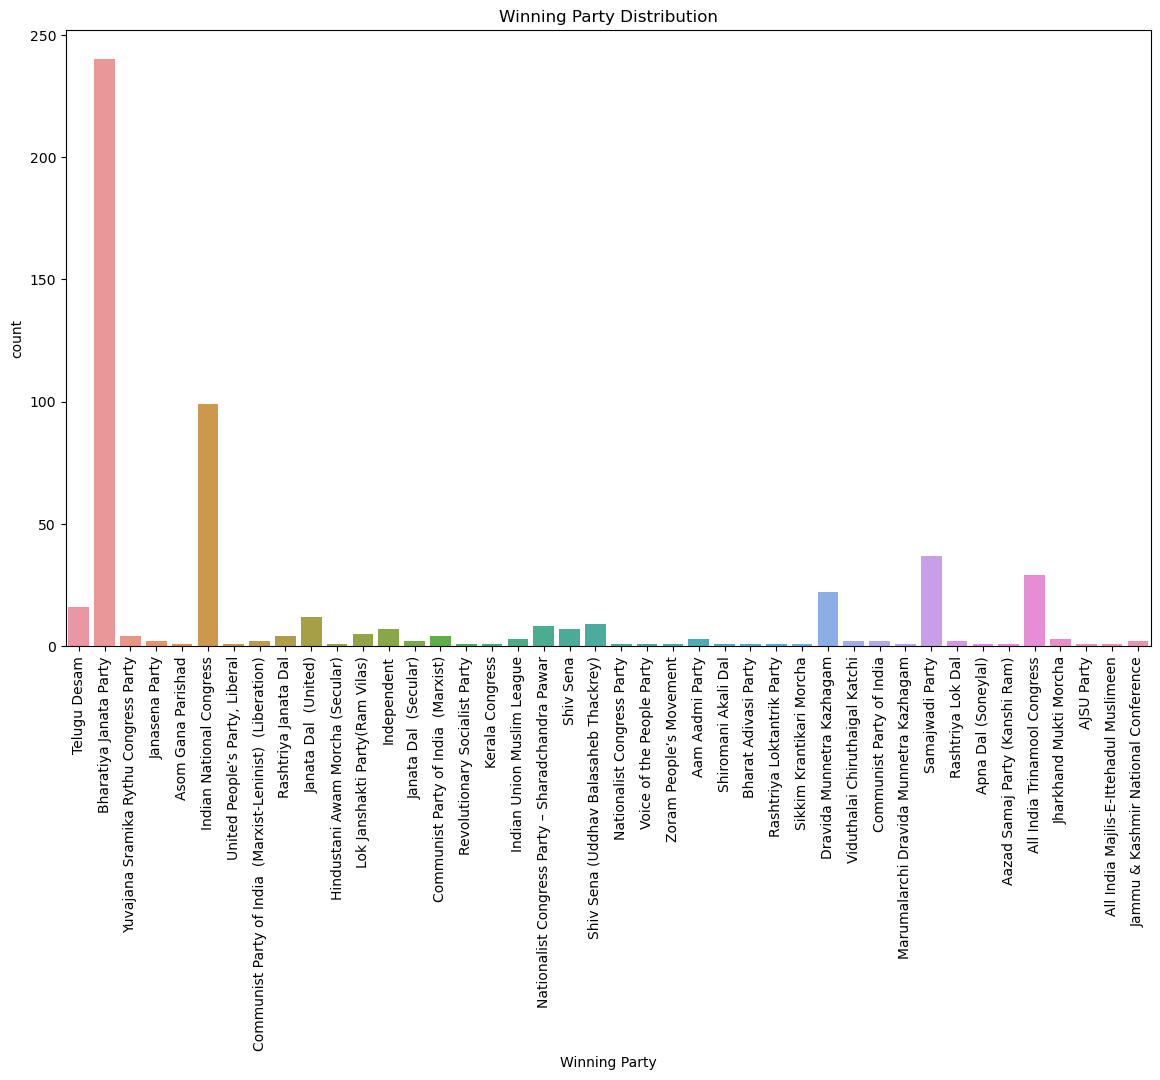

In [38]:
#Overview of Winning Party Distribution

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Winning Party')
plt.xticks(rotation=90)
plt.title('Winning Party Distribution')
plt.show()

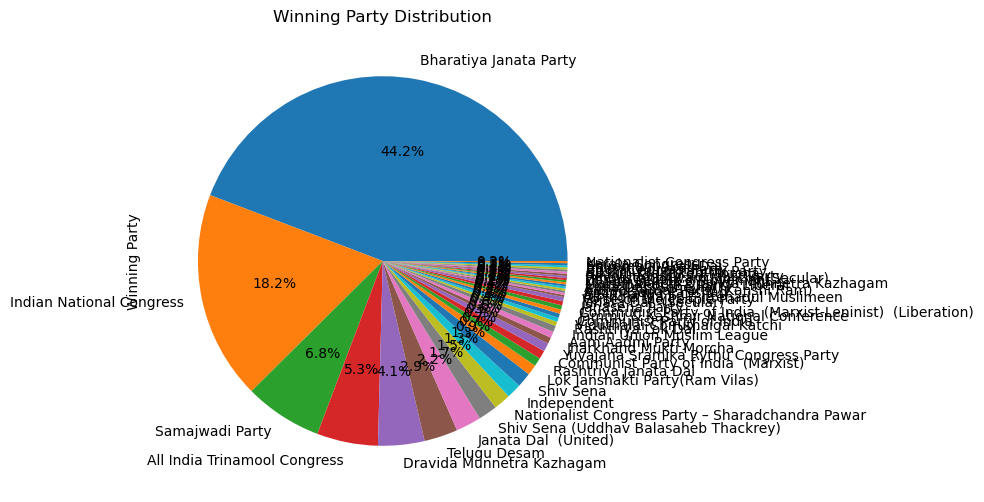

In [43]:
 #Distribution of Winning Party

plt.figure(figsize=(10, 6))
df['Winning Party'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Winning Party Distribution')
plt.show()

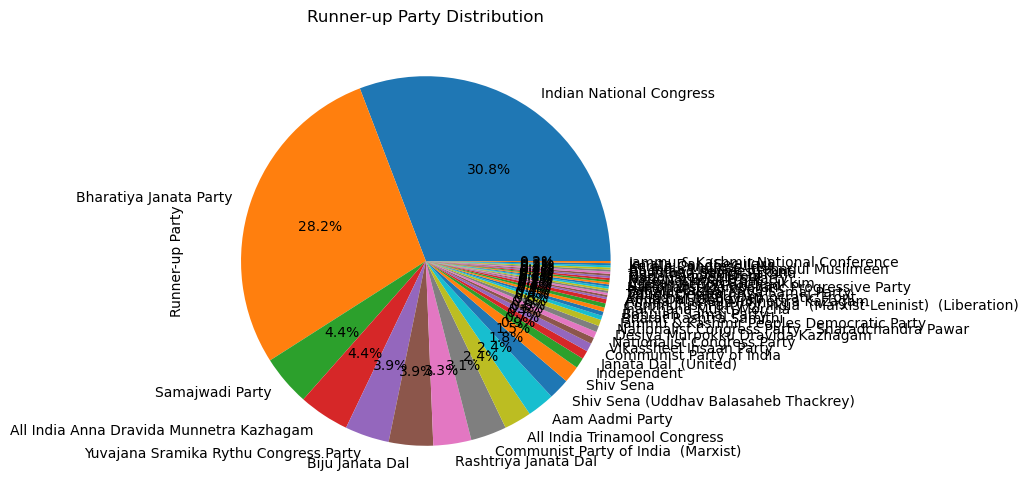

In [44]:
#Distribution of runnerup Party

plt.figure(figsize=(10, 6))
df['Runner-up Party'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Runner-up Party Distribution')
plt.show()

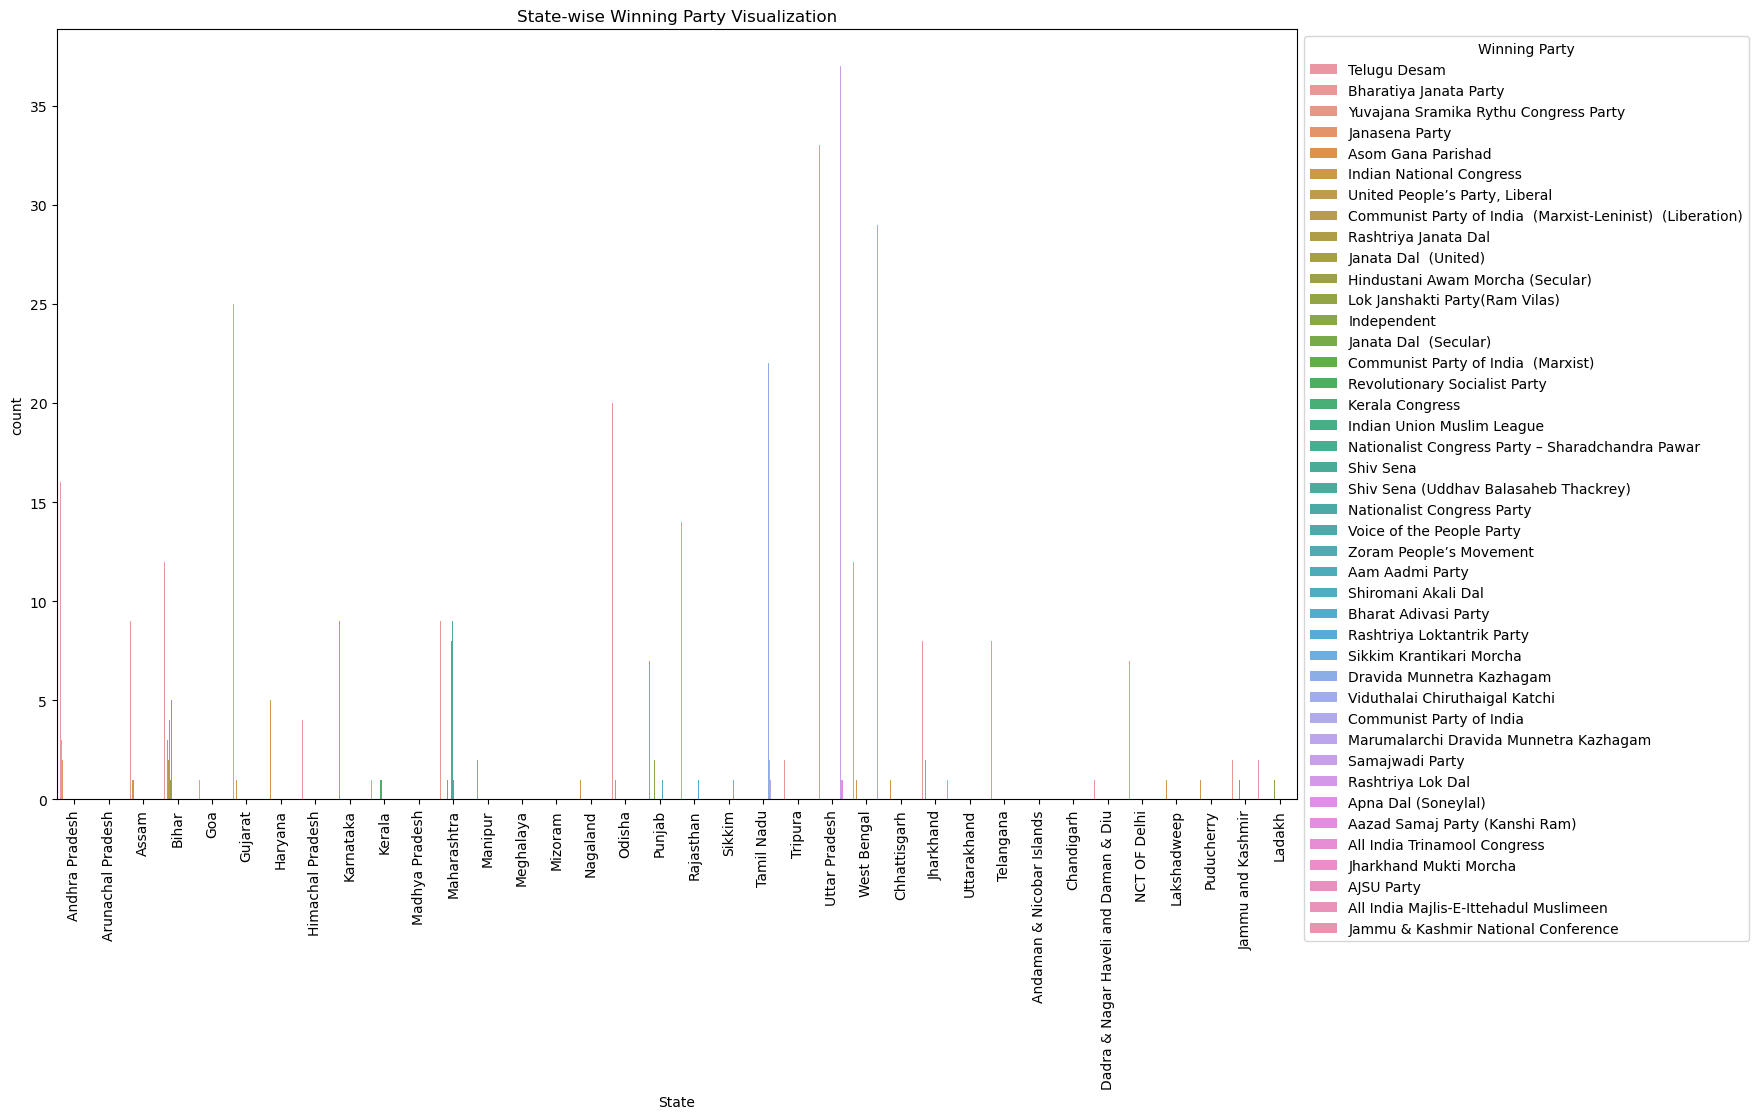

In [45]:
#State-wise Winning Party Visualization

plt.figure(figsize=(16, 10))
sns.countplot(data=df, x='State', hue='Winning Party')
plt.xticks(rotation=90)
plt.title('State-wise Winning Party Visualization')
plt.legend(title='Winning Party', bbox_to_anchor=(1, 1))
plt.show()


In [47]:
#Total number of winning candidates from each party

winning_party_counts = df['Winning Party'].value_counts()
print(winning_party_counts)


Bharatiya Janata Party                                        240
Indian National Congress                                       99
Samajwadi Party                                                37
All India Trinamool Congress                                   29
Dravida Munnetra Kazhagam                                      22
Telugu Desam                                                   16
Janata Dal  (United)                                           12
Shiv Sena (Uddhav Balasaheb Thackrey)                           9
Nationalist Congress Party – Sharadchandra Pawar                8
Independent                                                     7
Shiv Sena                                                       7
Lok Janshakti Party(Ram Vilas)                                  5
Rashtriya Janata Dal                                            4
Communist Party of India  (Marxist)                             4
Yuvajana Sramika Rythu Congress Party                           4
Jharkhand 

In [49]:
#Total number of runner-up candidates from each party

runner_up_party_counts = df['Runner-up Party'].value_counts()
print(runner_up_party_counts)


Indian National Congress                                      167
Bharatiya Janata Party                                        153
Samajwadi Party                                                24
All India Anna Dravida Munnetra Kazhagam                       24
Yuvajana Sramika Rythu Congress Party                          21
Biju Janata Dal                                                21
Rashtriya Janata Dal                                           18
Communist Party of India  (Marxist)                            17
All India Trinamool Congress                                   13
Aam Aadmi Party                                                13
Shiv Sena (Uddhav Balasaheb Thackrey)                          10
Shiv Sena                                                       8
Independent                                                     5
Janata Dal  (United)                                            4
Communist Party of India                                        4
Vikassheel

In [53]:
# Convert 'Margin Votes' to numeric, coerce errors to NaN
df['Margin Votes'] = pd.to_numeric(df['Margin Votes'], errors='coerce')

# Calculate the average margin votes
average_margin_votes = df['Margin Votes'].mean()
print(f'Average margin votes: {average_margin_votes}')


Average margin votes: 162350.08302583024


In [ ]:
#Finding the state with the maximum margin of victory

max_margin_state = df.loc[df['Margin Votes'].idxmax()]['State']
print(f'State with maximum margin of victory: {max_margin_state}')

In [55]:
#Total number of uncontested seats

uncontested_seats = df[df['Results Status'] == 'Uncontested']
print(uncontested_seats)


       State  PC No PC Name               Winning Candidate  \
105  Gujarat     24   Surat  MUKESHKUMAR CHANDRAKAANT DALAL   

              Winning Party Runner-up Canddiate Runner-up Party  Margin Votes  \
105  Bharatiya Janata Party                 NaN             NaN           NaN   

    Results Status  
105    Uncontested  


In [58]:
winning_party_by_state = pd.crosstab(election_data['State'], election_data['Winning Party'])
winning_party_by_state


Winning Party,AJSU Party,Aam Aadmi Party,Aazad Samaj Party (Kanshi Ram),All India Majlis-E-Ittehadul Muslimeen,All India Trinamool Congress,Apna Dal (Soneylal),Asom Gana Parishad,Bharat Adivasi Party,Bharatiya Janata Party,Communist Party of India,...,Shiromani Akali Dal,Shiv Sena,Shiv Sena (Uddhav Balasaheb Thackrey),Sikkim Krantikari Morcha,Telugu Desam,"United People’s Party, Liberal",Viduthalai Chiruthaigal Katchi,Voice of the People Party,Yuvajana Sramika Rythu Congress Party,Zoram People’s Movement
State,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Andhra Pradesh,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,16,0,0,0,4,0
Arunachal Pradesh,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Assam,0,0,0,0,0,0,1,0,9,0,...,0,0,0,0,0,1,0,0,0,0
Bihar,0,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chhattisgarh,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
Dadra & Nagar Haveli and Daman & Diu,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Goa,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
state_with_most_constituencies = election_data['State'].value_counts().idxmax()
state_with_most_constituencies

'Uttar Pradesh'